In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### Data

In [2]:
# load train data / label
with np.load('train_data_label.npz') as data:
    train_data = data['train_data']
    train_label = data['train_label']
# load test data / label
with np.load('test_data_label.npz') as data:
    test_data = data['test_data']
    test_label = data['test_label']

#### Data inspection

In [3]:
train_data[:5,:]

array([[107, 118, 127, ..., 204, 203, 202],
       [155, 157, 156, ..., 103, 135, 149],
       [187, 188, 188, ..., 195, 194, 195],
       [211, 211, 212, ..., 222, 229, 163],
       [164, 167, 170, ..., 163, 164, 179]], dtype=int64)

In [4]:
# no feature engineering needed 
print('train data type:',train_data.dtype)
print('test data type:', test_data.dtype)

train data type: int64
test data type: int64


In [5]:
# train_set shape (27455, 784)
print('train_data size / shape:', train_data.size, train_data.shape)
# train_label shape(27455,)
print('train_label size / shape:', train_label.size, train_label.shape)
# test_set shape (7172, 784)
print('test_data size / shape:', test_data.size, test_data.shape)
# test_label shape (7172,)
print('test_label size / shape:', test_label.size, test_label.shape)

train_data size / shape: 21524720 (27455, 784)
train_label size / shape: 27455 (27455,)
test_data size / shape: 5622848 (7172, 784)
test_label size / shape: 7172 (7172,)


Text(0.5, 1.0, 'Label Proportions')

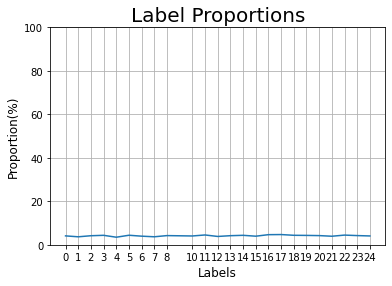

In [6]:
# the proportion of classes in train_set is relatively balanced, no outliers
classes = dict(Counter(train_label))
sorted_classes = list(sorted(classes.items()))
label, count = zip(*sorted_classes)
percentage = [round(i/sum(count)*100, 2) for i in count]
plt.plot(label, percentage)
plt.ylim(0, 100)
plt.xticks(label, label)
plt.grid()
plt.ylabel('Proportion(%)', size=12)
plt.xlabel('Labels', size=12)
plt.title('Label Proportions', size=20)

In [7]:
# no missing values in train_data
train_na = np.isnan(train_data)
print(train_na[train_na == True])

# no missing values in train_label
label_na = np.isnan(train_label)
print(label_na[label_na == True])

[]
[]


In [8]:
# optional feature transformation - feature scaling (Standardization)
scaler = StandardScaler()
train = scaler.fit_transform(train_data)
test = scaler.transform(test_data)

In [9]:
# split data
X_train, X_val, y_train, y_val = train_test_split(train, train_label, test_size=0.3, random_state=42)

### Model KNN

In [5]:
# initial model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_val)

In [6]:
accuracy_score(y_val, y_pred)

0.9918659706203715

In [7]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       327
           1       0.99      1.00      0.99       275
           2       1.00      1.00      1.00       335
           3       0.99      1.00      0.99       375
           4       0.99      0.99      0.99       293
           5       1.00      1.00      1.00       373
           6       0.99      1.00      1.00       323
           7       1.00      0.99      0.99       299
           8       1.00      0.98      0.99       356
          10       0.99      0.99      0.99       331
          11       1.00      0.99      1.00       387
          12       0.97      0.98      0.97       342
          13       0.98      0.98      0.98       339
          14       1.00      1.00      1.00       354
          15       1.00      1.00      1.00       315
          16       1.00      1.00      1.00       406
          17       0.98      0.99      0.99       393
          18       0.99    

In [8]:
# Hyperparameter settings
n_neighbors = list(range(1, 10, 2))
leaf_size = list(range(20, 40, 2))
# p = [1, 2]

In [ ]:
# tuning
predictions = []
results = []
n = 1
for k in n_neighbors:
    for leaf in leaf_size:
        clf = KNeighborsClassifier(n_neighbors=k, leaf_size=leaf)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_val)
        predictions.append(y_pred)
        results.append([n, k, leaf, accuracy_score(y_val, y_pred)])     
        n += 1

In [ ]:
results_np = np.array(results)
print(results_np[:10, :])
print()
print(results_np[10:20, :])
print()
print(results_np[20:30, :])
print()
print(results_np[30:40, :])
# when k=1, accuracy is high

In [39]:
# test set k=1
knn_k1 = KNeighborsClassifier(n_neighbors=1)
knn_k1.fit(train, train_label)
y_pred_k1 = knn_k1.predict(test)
print(classification_report(test_label, y_pred_k1))


              precision    recall  f1-score   support

           0       0.85      0.99      0.92       331
           1       0.94      0.91      0.93       432
           2       0.95      1.00      0.97       310
           3       0.81      0.95      0.87       245
           4       0.79      0.98      0.87       498
           5       1.00      0.95      0.97       247
           6       0.92      0.93      0.93       348
           7       0.97      0.97      0.97       436
           8       0.91      0.66      0.76       288
          10       0.82      0.61      0.70       331
          11       0.95      0.89      0.92       209
          12       0.79      0.55      0.65       394
          13       0.78      0.65      0.71       291
          14       1.00      0.90      0.94       246
          15       1.00      1.00      1.00       347
          16       0.94      1.00      0.97       164
          17       0.38      0.59      0.46       144
          18       0.68    

In [43]:
print(confusion_matrix(test_label, y_pred_k1))

[[329   0   0   0   2   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0 393   0  19   0   0   0   0   0   6   0   0   0   0   0   0   0   0
    0   5   7   2   0   0]
 [  0   0 310   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   3   0 232   0   0   0   0   0   0   0   0   0   0   0   0  10   0
    0   0   0   0   0   0]
 [  0   0   0   0 490   0   0   0   0   0   0   0   3   0   0   0   0   5
    0   0   0   0   0   0]
 [  0   0   1   0   0 234   1   0   0   0   3   0   0   0   0   0   0   0
    7   0   0   1   0   0]
 [  0   0   0   0   0   0 325   2   0   0   0   0   0   0   0   0   0   0
   21   0   0   0   0   0]
 [  0   0   0   0   0   0  12 422   1   0   0   0   0   0   0   0   0   0
    1   0   0   0   0   0]
 [ 17   0   1   3  20   1   1   0 189   0   0   3   5   0   0   0   0  19
    0   0   2   0   0  27]
 [  0   8   0  17   0   0   0   0   1 203   0   0   0   0   0   2  22   0
    0  43  20  15

### Model 2 LogisticRegression

In [ ]:
# initial model 
lr_base = LogisticRegression()
lr_base.fit(X_train, y_train)
y_pred_base = lr_base.predict(X_val)
print(classification_report(y_val, y_pred_base))

#### LogisticRegression Hyperparameter Tuning 

In [49]:
# hyperparameters settings

solvers = ['lbfgs', 'saga']
penalties = ['l2', 'none']
multi_class = 'multinomial'
C = [100, 10, 1, 0.1, 0.01]
max_iter = [100, 1000]
random_state = 42


In [ ]:
# tuning
pred_lr = []
result_lr = []
n = 1
for solver in solvers:
    for penalty in penalties:
        for c in C:
            lr = LogisticRegression(penalty=penalty, 
                                    C=c, 
                                    random_state=random_state, 
                                    multi_class=multi_class, 
                                    max_iter=100, 
                                    solver=solver)
            lr.fit(X_train, y_train)
            y_pred_lr = lr.predict(X_val)
            pred_lr.append(y_pred_lr)
            result_lr.append([n, solver, penalty, c, i, accuracy_score(y_val, y_pred_lr)])
            n += 1


In [53]:
# show first 20 results
result_lr_np = np.array(result_lr)
result_lr_np[:20]

array([['1', 'lbfgs', 'l2', '100', '100', '1.0'],
       ['2', 'lbfgs', 'l2', '10', '100', '0.9998785965764234'],
       ['3', 'lbfgs', 'l2', '1', '100', '0.9998785965764234'],
       ['4', 'lbfgs', 'l2', '0.1', '100', '0.9995143863056938'],
       ['5', 'lbfgs', 'l2', '0.01', '100', '0.9979361417991988'],
       ['6', 'lbfgs', 'none', '100', '100', '0.9998785965764234'],
       ['7', 'lbfgs', 'none', '10', '100', '0.9998785965764234'],
       ['8', 'lbfgs', 'none', '1', '100', '0.9998785965764234'],
       ['9', 'lbfgs', 'none', '0.1', '100', '0.9998785965764234'],
       ['10', 'lbfgs', 'none', '0.01', '100', '0.9998785965764234'],
       ['11', 'saga', 'l2', '100', '100', '0.9995143863056938'],
       ['12', 'saga', 'l2', '10', '100', '0.9995143863056938'],
       ['13', 'saga', 'l2', '1', '100', '0.9995143863056938'],
       ['14', 'saga', 'l2', '0.1', '100', '0.9993929828821173'],
       ['15', 'saga', 'l2', '0.01', '100', '0.9979361417991988'],
       ['16', 'saga', 'none', '100'

In [56]:
# best params
result_lr_np[0]

array(['1', 'lbfgs', 'l2', '100', '100', '1.0'], dtype='<U18')

In [60]:
# train model on entire dataset with best params (new)

lr_best = LogisticRegression(solver='lbfgs', penalty='l2', C=100)
lr_best.fit(train, train_label)
y_pred_best = lr_best.predict(test)
print(classification_report(test_label, y_pred_best))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89       331
           1       0.95      0.90      0.93       432
           2       0.93      0.86      0.89       310
           3       0.91      0.81      0.86       245
           4       0.87      0.89      0.88       498
           5       0.68      0.91      0.78       247
           6       0.83      0.85      0.84       348
           7       0.76      0.76      0.76       436
           8       0.63      0.65      0.64       288
          10       0.64      0.37      0.47       331
          11       0.56      0.79      0.66       209
          12       0.72      0.69      0.70       394
          13       0.65      0.56      0.60       291
          14       0.99      0.61      0.76       246
          15       0.94      0.99      0.96       347
          16       0.71      0.74      0.73       164
          17       0.18      0.43      0.25       144
          18       0.45    

C:\Users\abc\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
# Confusion matrix
lr_confusion = confusion_matrix(test_label, y_pred_best)
print(lr_confusion)

### Model comparison

In [62]:
data2 = {'Model': ['LogisticRegression', 'KNeighborsClassifier'],
        'Val_accuracy': [result_lr_np[0,-1], results_np[0,-1]], 
        'Test_accuracy':[round(accuracy_score(test_label, y_pred_best),2), round(accuracy_score(test_label, y_pred_k1),2)]}
pd.DataFrame(data2)

,Model,Val_accuracy,Test_accuracy
0,LogisticRegression,1.0,0.69
1,KNeighborsClassifier,0.997451,0.82


---------------------------------------------------------------------------